<a href="https://colab.research.google.com/github/Jaumzinho109/Impactus_Python_Scripts/blob/main/Payroll_graphs_and_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

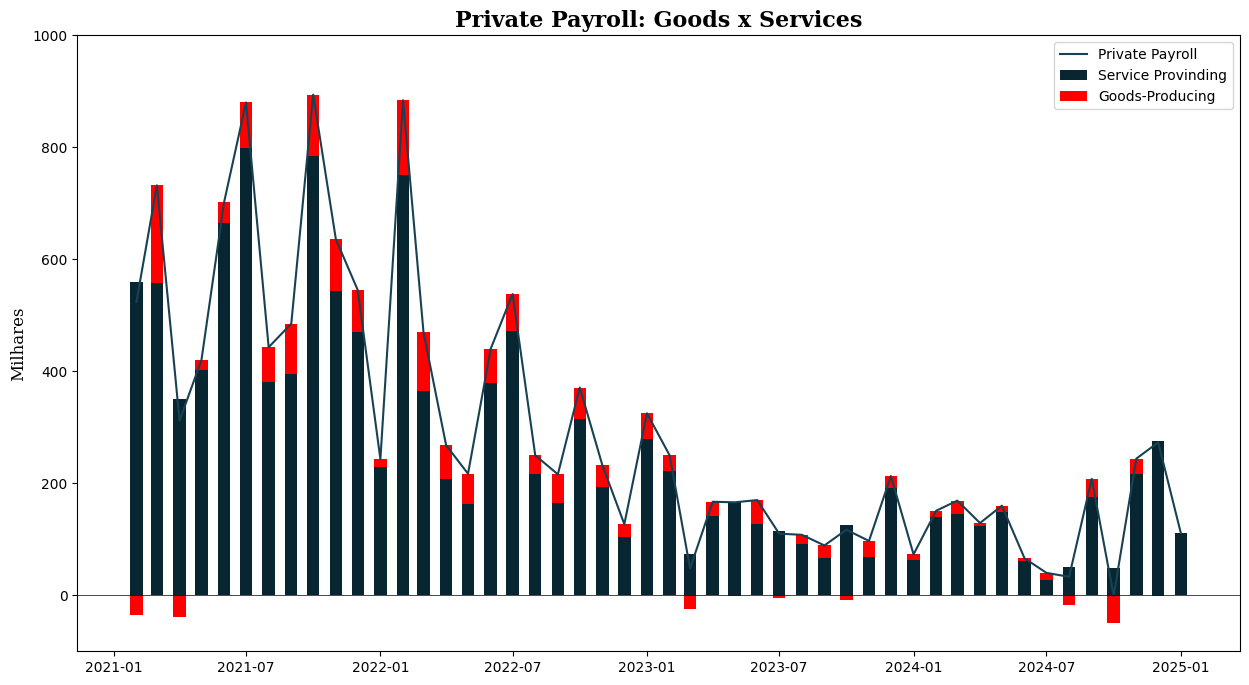

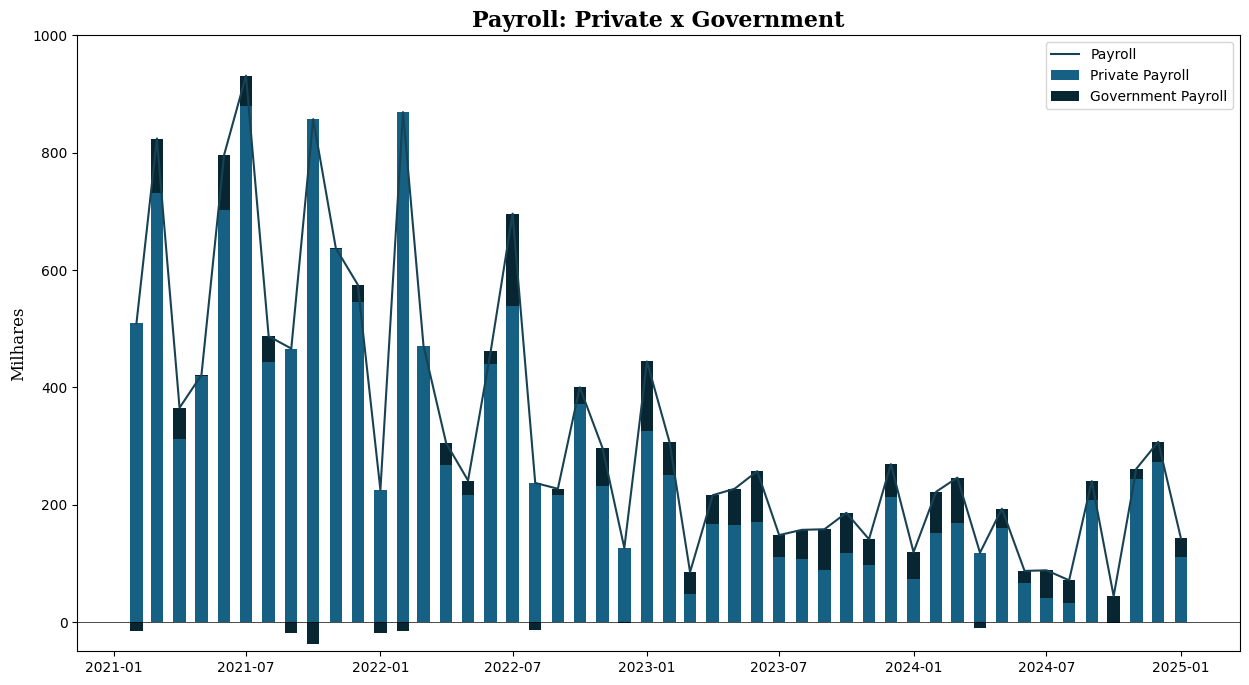

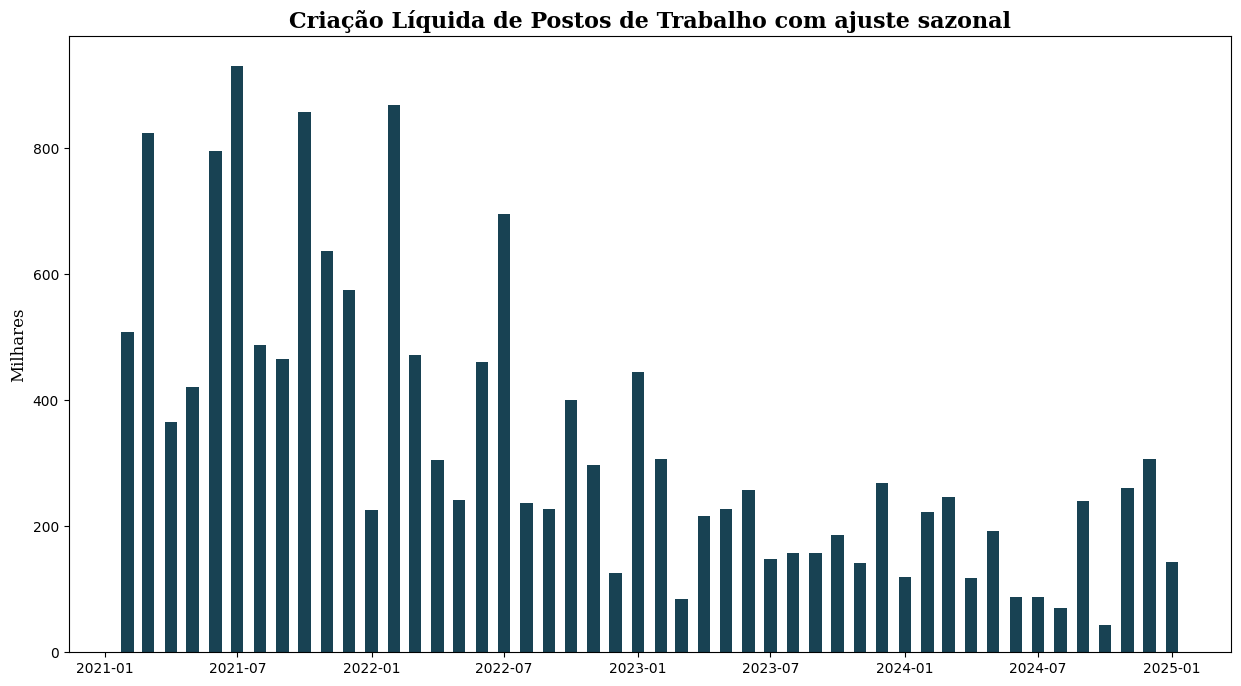

In [14]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import numpy as np

fred = Fred(api_key="672d5598c8a41df9397cc5eb92c02d5e")#Minha chave do FED

#Pegando dados do Payroll
dados = fred.get_series("PAYEMS")
df = pd.DataFrame(dados, columns=["Total"])
df.index.name = "Date"
df["Criação Líquida de Postos de Trabalho"] = df["Total"].diff()
payroll_2324 = df.tail(48)
indice = payroll_2324.index

#Payroll do governo
government_payroll_data = fred.get_series("USGOVT")
goverment_payroll = pd.DataFrame(government_payroll_data, columns=["Total"])
goverment_payroll.index.name = "Date"
goverment_payroll["Criação Líquida de Postos de Trabalho no Governo"] = goverment_payroll["Total"].diff()
gov = goverment_payroll.tail(48)

#Payroll Privado
private_payroll_data = fred.get_series("USPRIV")
private_payroll = pd.DataFrame(private_payroll_data, columns = ["Total"])
private_payroll.index.name = "Date"
private_payroll["Criação Líquida de Postos de Trabalho no Setor Privado"] = private_payroll["Total"].diff()
priv = private_payroll.tail(48)

#Payroll privado - parte de bens
goods_payroll_data = fred.get_series("USGOOD")
goodp_payroll = pd.DataFrame(goods_payroll_data, columns = ["Total"])
goodp_payroll.index.name = "Date"
goodp_payroll["Criação Líquida de Postos de Trabalho em Bens no Setor Privado"] = goodp_payroll["Total"].diff()
good = goodp_payroll.tail(48)

#Payroll privado - parte de serviços
services_payroll_data = fred.get_series("CES0800000001")
services_private_payroll = pd.DataFrame(services_payroll_data, columns = ["Total"])
services_private_payroll.index.name = "Date"
services_private_payroll["Criação Líquida de Postos em Serviços no Setor Privado"] = services_private_payroll["Total"].diff()
servp = services_private_payroll.tail(48)

#Transformando valores em matrizes
servp_values = np.array(servp["Criação Líquida de Postos em Serviços no Setor Privado"])
good_values = np.array(good["Criação Líquida de Postos de Trabalho em Bens no Setor Privado"])

#Arrumando quem vai ficar em cima ou em baixo, a fim de que o gráfico de barras
#para que os valores negativos apareçam
bottom_good = np.where(good_values >= 0, servp_values, 0)
bottom_serv = np.where(good_values < 0, good_values, 0)

#Gráfico para setor privado: bens e serviços
plt.figure(figsize= (15,8))
plt.bar(indice, servp_values, width=17, color="#082631", label="Service Provinding")
plt.bar(indice, good_values, width=17, color="red", label="Goods-Producing", bottom=bottom_good)
plt.plot(indice, priv["Criação Líquida de Postos de Trabalho no Setor Privado"], color= '#184253', label= "Private Payroll")
plt.ylim( -100, 1000)
plt.legend()
plt.title("Private Payroll: Goods x Services", fontweight="bold", fontsize=16, family='serif')
plt.axhline(y=0, color="black",  linewidth=0.5, label="Linha no eixo X")
plt.ylabel("Milhares", fontsize = 12, family='serif')
plt.show()


#Tratando valores do payroll do governo e privado para valores negativos aparecerem
priv_values = np.array(priv["Criação Líquida de Postos de Trabalho no Setor Privado"])
gov_values = np.array(gov["Criação Líquida de Postos de Trabalho no Governo"])
bottom_gov = np.where(gov_values >= 0, priv_values, 0)
bottom_priv = np.where(gov_values < 0, gov_values, 0)

#Gráfico payroll governo e privado
plt.figure(figsize= (15,8))
plt.bar(indice, priv_values, width=17, color="#166083", label="Private Payroll", bottom=bottom_priv)
plt.bar(indice, gov_values, width=17, color="#082631", label="Government Payroll", bottom=bottom_gov)
plt.plot(indice, payroll_2324["Criação Líquida de Postos de Trabalho"], color= '#184253', label= "Payroll")
plt.ylim( - 50, 1000)
plt.legend()
plt.title("Payroll: Private x Government", fontweight="bold", fontsize=16, family='serif')
plt.axhline(y=0, color="black",  linewidth=0.5, label="Linha no eixo X")
plt.ylabel("Milhares", fontsize = 12, family='serif')
plt.show()

#Gráfico payroll
plt.figure(figsize=(15, 8))
plt.bar(indice, payroll_2324["Criação Líquida de Postos de Trabalho"], width=17, color= "#184253")
plt.title("Criação Líquida de Postos de Trabalho com ajuste sazonal", fontweight="bold", fontsize=16, family='serif')
plt.ylabel("Milhares", fontsize = 12, family='serif')
plt.show()

In [15]:
#Pegando dados de acíclicos

dados_private_ed_health = fred.get_series("USEHS")
private_ed_health = pd.DataFrame(dados_private_ed_health, columns= ["Total"])
private_ed_health["Criação líquida em acíclicos"] = private_ed_health["Total"].diff()
acyclic = private_ed_health.tail(48).copy()
acyclic["Private ex education and Health care and Social Ass."] = priv["Criação Líquida de Postos de Trabalho no Setor Privado"] - acyclic["Criação líquida em acíclicos"]
acyclic["Government + Health Care + Education"] = gov["Criação Líquida de Postos de Trabalho no Governo"] + acyclic["Criação líquida em acíclicos"]
acyclic["P1"] = payroll_2324["Criação Líquida de Postos de Trabalho"]
acyclic["P2"] = acyclic["Private ex education and Health care and Social Ass."] + acyclic["Government + Health Care + Education"]
display(acyclic)

,Total,Criação líquida em acíclicos,Private ex education and Health care and Social Ass.,Government + Health Care + Education,P1,P2
2021-02-01,23411.0,57.0,467.0,42.0,509.0,509.0
2021-03-01,23530.0,119.0,613.0,211.0,824.0,824.0
2021-04-01,23574.0,44.0,268.0,97.0,365.0,365.0
2021-05-01,23617.0,43.0,377.0,44.0,421.0,421.0
2021-06-01,23643.0,26.0,676.0,120.0,796.0,796.0
2021-07-01,23693.0,50.0,830.0,101.0,931.0,931.0
2021-08-01,23723.0,30.0,413.0,74.0,487.0,487.0
2021-09-01,23700.0,-23.0,508.0,-42.0,466.0,466.0
2021-10-01,23800.0,100.0,794.0,63.0,857.0,857.0
2021-11-01,23849.0,49.0,587.0,50.0,637.0,637.0


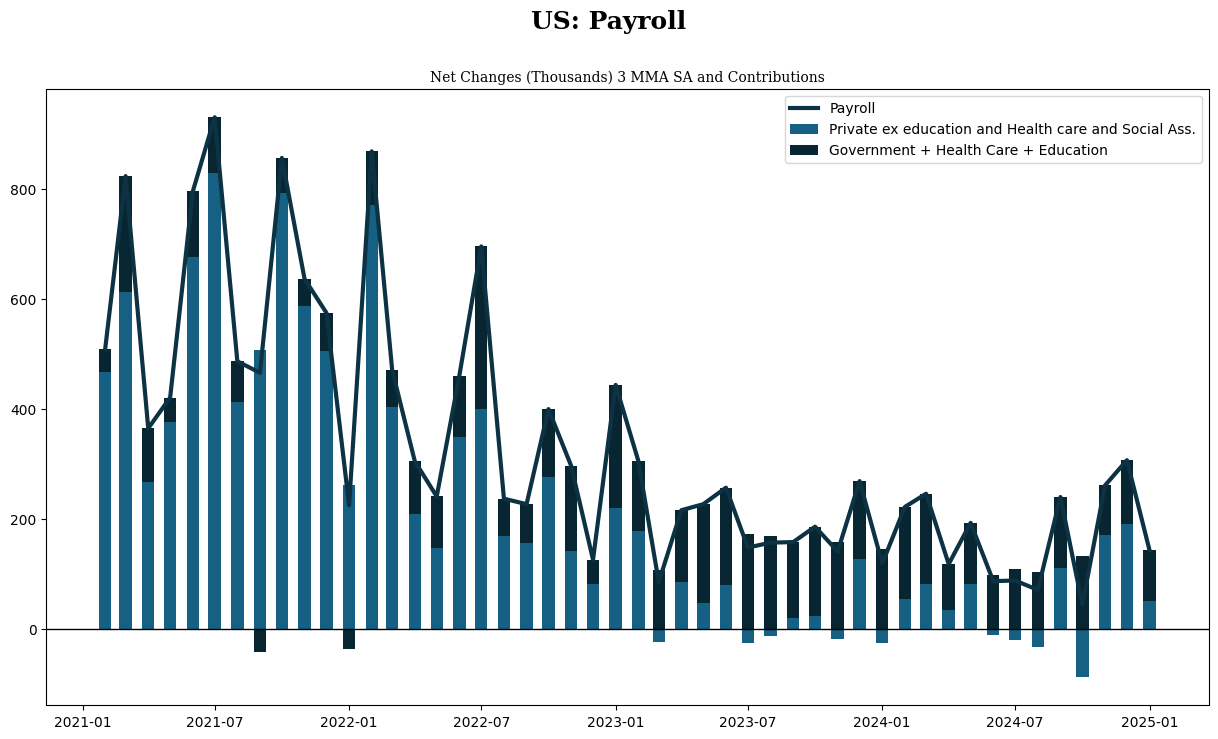

In [16]:

#coloquei em matrizes para separá-los em positivos e negativos e assim o gráfico n ficar esquisitão
cic_values = np.array(acyclic["Private ex education and Health care and Social Ass."])
acic_values = np.array(acyclic["Government + Health Care + Education"])
#Isso foi deveras desagradável, tive que dividir os valores em positivos e negativos para colocar todos os
#positivos em cima e todos os negativos em baixo
cic_positive = np.where(cic_values > 0, cic_values, 0)
cic_negative = np.where(cic_values < 0, cic_values, 0)

acic_positive = np.where(acic_values > 0, acic_values, 0)
acic_negative = np.where(acic_values < 0, acic_values, 0)

plt.figure(figsize=(15, 8))

#Privado positivo e negativo
plt.bar(indice, cic_positive, width=17, color="#166083", label="Private ex education and Health care and Social Ass.")
plt.bar(indice, cic_negative, width=17, color="#166083")

#Acíclico positivo e negativo
plt.bar(indice, acic_positive, width=17, color="#082631", label="Government + Health Care + Education", bottom=cic_positive)
plt.bar(indice, acic_negative, width=17, color="#082631")

#linhas para payroll
plt.plot(indice, payroll_2324["Criação Líquida de Postos de Trabalho"], linewidth= 3, label= "Payroll", color= "#0c3243")

plt.title("Net Changes (Thousands) 3 MMA SA and Contributions", fontsize= 10, family='serif')
plt.suptitle("US: Payroll", fontweight="bold", fontsize=18, family='serif')

plt.axhline(0, color='black', linewidth=1)
plt.legend()
plt.show()